In [22]:
from __future__ import absolute_import, division, print_function
import os
import sys
import numpy as np
import numpy.random as npr
import tensorflow as tf
import matplotlib.pyplot as plt
import json

PATH_NET = os.path.dirname(os.getcwd())
sys.path.insert(0, PATH_NET)

In [23]:
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model,Sequential_Model
import tools
from tools_lnd import find_ckpts, take_names

# We demonstrate our analyses on a single trained network provided in the github repo, and work through analyses that can be done on a single network.

## If you're interested in more details, reach out and we can share all the networks and code used in the paper.

In [24]:
tasks = ['fdgo','fdanti','delaygo','delayanti']
rule_name={'fdgo': 'DelayPro', 'fdanti':'DelayAnti', 'delaygo':'MemoryPro', 'delayanti':'MemoryAnti'}

# directory where example network is stored
model_dir = os.path.join(PATH_NET, 'data', 'trained_models','0')

fntsz = 24
ymin = -4.5
ymax = 2.5

# sequential training without forgetting: log cost on test trials

<Figure size 1080x360 with 0 Axes>

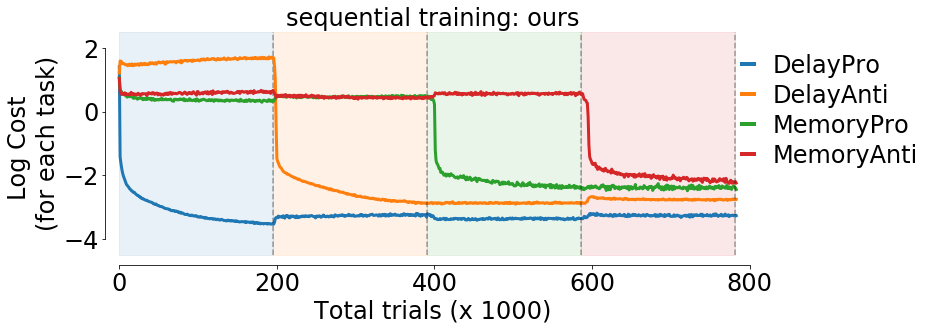

In [25]:
r = 0
totalSteps = len(tasks) * 1.25e7/64/1000
f = plt.figure(figsize=(15,5))

fig, axes = plt.subplots(1,1,figsize=(14,5.), sharey=True, 
                         gridspec_kw={'hspace': 0, 'wspace': 0})

cmap = plt.get_cmap('tab10')

maxsteps = 1.25e7
ntaskiters = np.append(0, np.cumsum([maxsteps/64/1000 for _ in range(len(tasks))]))
fname = os.path.join(model_dir, 'log.json')
with open(fname, 'r') as f:
        log_all = json.load(f)
for rule in tasks:

    # plot loss
    c = cmap(r)
    x = np.log(log_all['cost_'+ rule])

    axes.plot(x,'-',c = c, linewidth=3, label=rule_name[rule])

    axes.fill_between(ntaskiters[r:r+2], y1=[ymin,ymin], y2=[ymax,ymax], color=c, alpha=0.1)
    axes.plot([ntaskiters[r+1], ntaskiters[r+1]], [ymin,ymax], 'k--', alpha=0.35)    
    r +=1
    
axes.set_ylabel('Log Cost \n(for each task)',fontsize=fntsz)
axes.set_xlabel('Total trials (x 1000)',fontsize=fntsz)

axes.label_outer()

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.tick_params(axis='both',labelsize=fntsz)

axes.spines['left'].set_position(('outward', 10))
axes.spines['bottom'].set_position(('outward', 10))

axes.spines['left'].set_bounds(ymin + 0.5, ymax-0.5)
axes.spines['bottom'].set_bounds(0, 800)
axes.set_yticks([-4,-2,0, 2])
axes.set_ylim([ymin,ymax])        
axes.set_xlim([-5,800])        


leg = plt.legend(fontsize=fntsz,frameon=False, handlelength=0.5,labelspacing=0.25,
                loc='upper right', bbox_to_anchor=(1.3, 1.))
for line in leg.get_lines():
    line.set_linewidth(4)
    
    
plt.title('sequential training: ours', fontsize=fntsz)
plt.tight_layout()
plt.show()

# Example analysis: identifying fixed point structure


### To run this section, you have to run the script `analyses\run_fixed_point_finder.py` first.

In [26]:
from network import Model, FixedPoint_Model
import tools
from tools_lnd import generate_Beta_epoch, make_fp_tdr_fig, make_fp_struct
from tools_lnd import make_h_trial_rule, comp_eig_decomp, plot_FP, get_model_params, plot_epoch_dynamics

#output dynamics
dims ='tdr'
fp_file = 'tf_fixed_pts_all_init'
h,trial,tasks = make_h_trial_rule(model_dir)
w_in, b_in, w_out, b_out = get_model_params(model_dir)

Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Model restored from file: /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Model restored from file: /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt


Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Model restored from file: /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/fdanti/stim1_180.0.npz


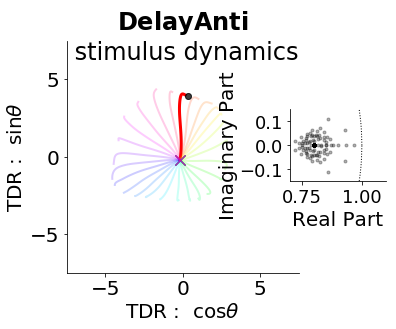

In [35]:
plt.rcParams.update({'font.size': 20})

stim_theta = 180
rule = 'fdanti'
epoch = 'stim1'
h,trial,tasks = make_h_trial_rule(model_dir,mode = 'test')
B = generate_Beta_epoch(h[rule],trial[rule],ind = -1)
D_use = B[epoch]
lim = 7.5
ax = plot_epoch_dynamics(model_dir,fp_file,epoch,h,trial,rule,D_use,[stim_theta,],lim = lim)

plt.subplots_adjust(bottom=0.3, right=.9, top=0.9,wspace = 0,hspace = 0)

plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Model restored from file: /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/fdanti/go1_180.0.npz


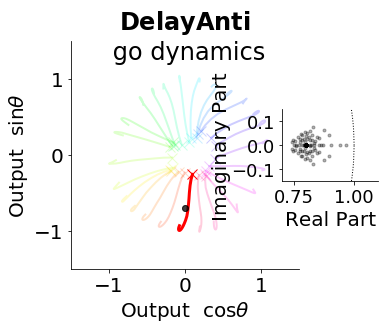

In [36]:
rule = 'fdanti'
epoch = 'go1'
w_in, b_in, w_out, b_out = get_model_params(model_dir)
D_use = w_out[:,1:]
lim = 2
plot_epoch_dynamics(model_dir,fp_file,epoch,h,trial,rule,D_use,[stim_theta,],lim = 1.5,ax_type = 'out')

plt.subplots_adjust(bottom=0.3, right=.9, top=0.9)

plt.show()

/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/delayanti/stim1_180.0.npz


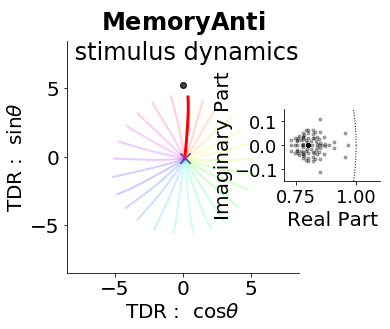

In [37]:
rule = 'delayanti'
epoch = 'stim1'
# h,trial,tasks = make_h_trial_rule(m)
B = generate_Beta_epoch(h[rule],trial[rule],ind = -1)
D_use = B[epoch]
lim = 8.5
plot_epoch_dynamics(model_dir,fp_file,epoch,h,trial,rule,D_use,[stim_theta,],lim = lim)

plt.subplots_adjust(bottom=0.3, right=.9, top=0.9)


plt.show()

/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/delayanti/delay1_180.0.npz


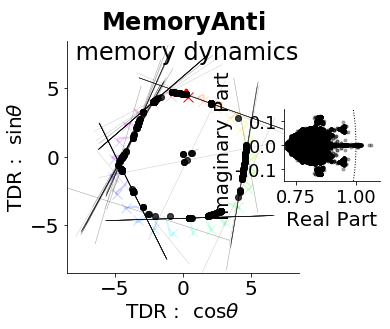

In [38]:
rule = 'delayanti'
epoch = 'delay1'
axes_epoch = 'stim1'
ax_type= 'tdr'
# h,trial,tasks = make_h_trial_rule(m)
B = generate_Beta_epoch(h[rule],trial[rule],ind = -1)
D_use = B[axes_epoch]
lim = 8.5
ax = plot_epoch_dynamics(model_dir,fp_file,epoch,h,trial,rule,D_use,[stim_theta,],lim = lim,epoch_axes = axes_epoch)

plt.subplots_adjust(bottom=0.3, right=.9, top=0.9)

plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Model restored from file: /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/delayanti/go1_180.0.npz


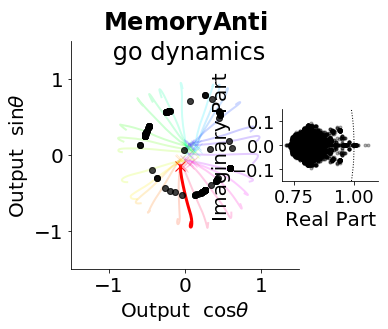

In [39]:
rule = 'delayanti'
epoch = 'go1'
w_in, b_in, w_out, b_out = get_model_params(model_dir)
D_use = w_out[:,1:]
plot_epoch_dynamics(model_dir,fp_file,epoch,h,trial,rule,D_use,[stim_theta,],ax_type = 'out')

plt.subplots_adjust(bottom=0.3, right=.9, top=0.9)

plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Model restored from file: /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/delayanti/delay1_180.0.npz


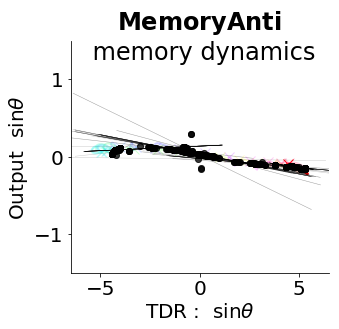

In [40]:
rule = 'delayanti'
epoch = 'delay1'
epoch_axes = 'go1'
ax_type = 'mix'
w_in, b_in, w_out, b_out = get_model_params(model_dir)
B = generate_Beta_epoch(h[rule],trial[rule],ind = 0)
D_use = np.concatenate((B[epoch_axes][:,1][:,np.newaxis],w_out[:,2][:,np.newaxis]),axis = 1)
lim = 6.5
ax = plot_epoch_dynamics(model_dir,fp_file,epoch,h,trial,rule,D_use,y_set = [stim_theta,],plot_eigenspect = False, lim = lim,
                    ax_type = 'mix',epoch_axes = 'stim1')

plt.subplots_adjust(bottom=0.3, right=.9, top=0.9)

plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Model restored from file: /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/delayanti/go1_180.0.npz


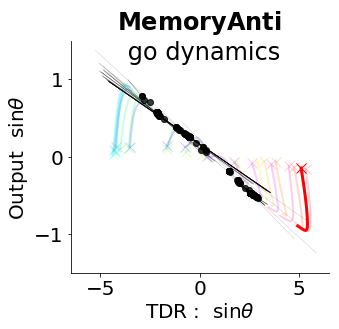

In [41]:
rule = 'delayanti'
epoch = 'go1'
epoch_axes = 'go1'
ax_type = 'mix'
w_in, b_in, w_out, b_out = get_model_params(model_dir)
B = generate_Beta_epoch(h[rule],trial[rule],ind = 0)
D_use = np.concatenate((B[epoch_axes][:,1][:,np.newaxis],w_out[:,2][:,np.newaxis]),axis = 1)
plot_epoch_dynamics(model_dir,fp_file,epoch,h,trial,rule,D_use,y_set = [stim_theta,],plot_eigenspect = False, lim = 6.5,
                    ax_type = 'mix',epoch_axes = 'stim1')

plt.subplots_adjust(bottom=0.3, right=.9, top=0.9)

plt.show()

# Example analysis: initial conditions across interfering tasks


Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Model restored from file: /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/fdgo/stim1_0.0.npz
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/fdanti/stim1_180.0.npz
stim1
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/fdgo/stim1_36.0.npz
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/fdanti/stim1_216.0.npz
stim1
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/fdgo/stim1_72.0.npz
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_ini

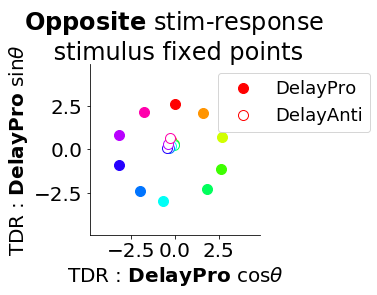

Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Model restored from file: /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/fdgo/stim1_0.0.npz
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/delaygo/stim1_0.0.npz
stim1
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/fdgo/stim1_36.0.npz
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/delaygo/stim1_36.0.npz
stim1
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init/fdgo/stim1_72.0.npz
/Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/tf_fixed_pts_all_init

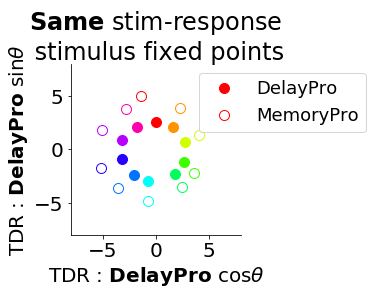

In [42]:
plt.rcParams.update({'font.size': 20})
dims ='tdr'
epoch = 'stim1'
seq = True
fp_file = 'tf_fixed_pts_all_init'
ind_stim_loc = 0

xs = np.linspace(-1, 1, 1000)
ys = np.sqrt(1 - xs**2)

tit = 'sequential'

rule1 = 'fdgo'
rule2 = 'fdanti'
ax = make_fp_tdr_fig(model_dir,fp_file,rule1,rule2,epoch,ind_stim_loc,tit)
plt.legend(('DelayPro','DelayAnti'),fontsize = 18,bbox_to_anchor=(.75, .95), loc='upper left', borderaxespad=0.)
plt.xlabel('TDR : '+r"$\bf{" + 'DelayPro' + "}$"+ r' $\cos{\theta}$')
plt.ylabel('TDR : ' +r"$\bf{" + 'DelayPro' + "}$" + r' $\sin{\theta}$')
plt.title(r"$\bf{" + 'Opposite' + "}$"+ ' stim-response \n stimulus fixed points')
lim = 4.9
plt.ylim((-lim,lim))
plt.xlim((-lim,lim))
ax.set_aspect('equal', 'box')
plt.show()

rule1 = 'fdgo'
rule2 = 'delaygo'
ax = make_fp_tdr_fig(model_dir,fp_file,rule1,rule2,epoch,ind_stim_loc,tit)
plt.legend(('DelayPro','MemoryPro'),fontsize = 18,bbox_to_anchor=(.75,.95), loc='upper left', borderaxespad=0.)
plt.xlabel('TDR : '+r"$\bf{" + 'DelayPro' + "}$"+r' $\cos{\theta}$')
plt.ylabel('TDR : ' +r"$\bf{" + 'DelayPro' + "}$" + r' $\sin{\theta}$')
plt.title(r"$\bf{" + 'Same' + "}$"+ ' stim-response \n stimulus fixed points')
lim = 8
plt.ylim((-lim,lim))
plt.xlim((-lim,lim))
ax.set_aspect('equal', 'box')

plt.show()

Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Model restored from file: /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Model restored from file: /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
/Users/leaduncker/Documents/git/seq

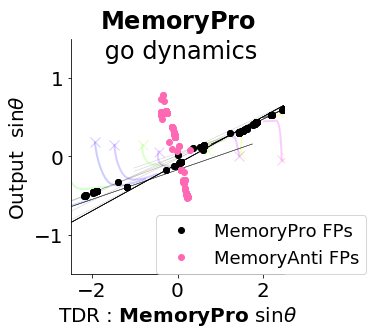

In [43]:
#output dynamics
dims ='tdr'
epoch = 'go1'
seq = True
fp_file = 'tf_fixed_pts_all_init'
rule1 = 'fdgo'
rule2 = 'delaygo'
ind_stim_loc_anti = 180
ind_stim_loc = 0

h,trial,tasks = make_h_trial_rule(model_dir,mode = 'test')
w_in, b_in, w_out, b_out = get_model_params(model_dir)

rule = 'delaygo'
epoch_axes = 'go1'
epoch_name = 'go'
ind_stim_loc_anti = 180
ind_stim_loc = 0

epoch_name, rule_name, epoch_axes_name, _ = take_names(epoch,rule,epoch_axes = epoch_axes,h_epoch = [])
B = generate_Beta_epoch(h[rule],trial[rule],ind = 0)
D_use = np.concatenate((B[epoch_axes][:,1][:,np.newaxis],w_out[:,2][:,np.newaxis]),axis = 1)
lim = 2.5
plot_epoch_dynamics(model_dir,fp_file,epoch,h,trial,rule,D_use,y_set = [ind_stim_loc,],plot_eigenspect = False, 
                    ax_type = 'mix',epoch_axes = 'stim1',lim = lim)
fps, J_xstar = make_fp_struct(model_dir,fp_file,rule,epoch,ind_stim_loc)
eig_decomps = comp_eig_decomp(J_xstar)
fps_tdr = np.dot(fps,D_use)
fp_c = 'k'
plt.plot(fps_tdr[:,0],fps_tdr[:,1],'o',c = 'k',markerfacecolor = fp_c,
         alpha = 1,label = rule_name + ' FPs')

rule = 'delayanti'
epoch_name_fp, rule_name_fp, _, _ = take_names(epoch,rule,epoch_axes = epoch_axes,h_epoch = [])
fps_anti, J_xstar = make_fp_struct(model_dir,fp_file,rule,epoch,ind_stim_loc_anti)
eig_decomps = comp_eig_decomp(J_xstar)
fps_tdr_anti = np.dot(fps_anti,D_use)
fp_c = 'hotpink'
plt.plot(fps_tdr_anti[:,0],fps_tdr_anti[:,1],'o',c = 'hotpink',markerfacecolor = fp_c,
         alpha = 1,label = rule_name_fp + ' FPs')
plt.legend(bbox_to_anchor=(.4, .25),loc='upper left', borderaxespad=0.,fontsize = 18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('TDR : '+r"$\bf{" + rule_name + "}$"+r' $\sin{\theta}$',fontsize = 20)
plt.ylabel('Output ' + r' $\sin{\theta}$',fontsize = 20)

plt.title(r"$\bf{" + rule_name + "}$"+ '\n '+epoch_name+' dynamics',y = .9)
ax.set_aspect('equal', adjustable='box')

plt.show()

# Example analysis: subspace angles

In [44]:
from scipy.linalg import subspace_angles

epoch_set = ['stim1','go1']
n_comp = 2
tasks = ['fdgo', 'delaygo', 'fdanti', 'delayanti']
n_task = len(tasks)

sa_set = np.empty((len(epoch_set),n_task,n_task,n_comp))
# this function can be found in tools_lnd.py, 
h,trial,_ = make_h_trial_rule(model_dir)

for ria in range(n_task):
    rule_a = tasks[ria]
    # this function can be found in tools_lnd.py, performs TDR to identify input subspace
    Beta_a = generate_Beta_epoch(h[rule_a],trial[rule_a],ind = -1)

    for rib in range(n_task): 
        rule_b = tasks[rib]
        # this function can be found in tools_lnd.py, performs TDR to identify input subspace
        Beta_b = generate_Beta_epoch(h[rule_b],trial[rule_b],ind = -1)

        for epoch_ind in range(len(epoch_set)):

            epoch = epoch_set[epoch_ind]
            # calculates subspace angles between TDR subspaces across tasks for each epoch separately
            sa_set[epoch_ind,ria,rib,:] = subspace_angles(Beta_a[epoch], Beta_b[epoch])

Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt
Model restored from file: /Users/leaduncker/Documents/git/sequential_multiTask_RNN/data/trained_models/0/model.ckpt


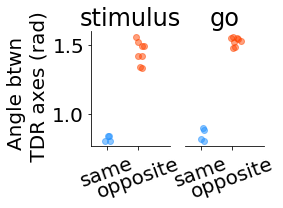

In [45]:
nr = 1
nc = 2

tit = 'sequential'
epoch_set = ['stim1','go1']
epoch_names = ['stimulus','go']
n_seeds = 5
    
fig = plt.figure(figsize=(3*nc, 4*nr))

for ei in range(len(epoch_set)):
    
    subplot_i = ei+1
    ax = plt.subplot(nr,nc,subplot_i)
    
    # for each dimension of the inputs (sin and cos theta), calculate the subspace angle 
    # of the input representation across tasks
    for dim in range(n_comp):
        sa_set_dim = sa_set[ei,:,:,dim]

        # across tasks with the opposite in/out relationship (ie. pro v. anti)
        inter_mat = sa_set_dim[2:,:2].flatten() 
        plt.plot(1+.1*npr.randn(len(inter_mat)),inter_mat,'o',c = 'orangered',alpha = .5)

        # across tasks with the same in/out relationship (ie. pro v. pro)
        intra_mat = [sa_set_dim[0,1],sa_set_dim[3,2]] 
        plt.plot(.1*npr.randn(len(intra_mat)),intra_mat,'o',c = 'dodgerblue',alpha = .5)
        
    plt.title(epoch_names[ei])
    if subplot_i==1:
        plt.ylabel('Angle btwn \n TDR axes (rad)') 
    else:
        plt.yticks([])
        ax.spines['left'].set_visible(False)

    plt.xticks((0,1),['same','opposite'],rotation = 20)
    plt.xlim((-.5,2))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.subplots_adjust(bottom=0.3, right=.7, top=0.7, left=.3)

plt.show()